<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/homework_2/hw2_problem1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#select required parameter
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [5]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication
y_val = y_val.to_numpy()


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()



X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

X_0_val = np.ones((len(x_val), 1))
x_val = np.hstack((X_0_val, x_val))

In [6]:
def compute_loss(X, y, theta):

    m = len(y)

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [7]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations):

    m = len(y_train)  # Number of training examples
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)


    for i in range(iterations):

        predictions = x_train.dot(theta)

        error = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * (x_train.transpose().dot(error))
        theta = theta - sum_delta

        training_loss_history[i] = compute_loss(x_train, y_train, theta)
        validation_loss_history[i] = compute_loss(x_val, y_val, theta)


    return theta, training_loss_history, validation_loss_history

In [35]:
#run gradient decent

theta = [0., 0., 0., 0., 0., 0.] #initialize
iterations = 50
alpha = 0.000000008
#alpha = 0.01

theta, training_loss_history, validation_loss_history = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print('Final value of theta =', theta, '\n')
print('training_loss_history =', training_loss_history[-5:], '\n')#print last 5 elements
print('validation_loss_history =', validation_loss_history[-5:])

Final value of theta = [2.87000431e-01 8.61913383e+02 9.70320830e-01 5.08097803e-01
 7.52317402e-01 2.34549059e-01] 

training_loss_history = [1.69010761e+12 1.69010757e+12 1.69010754e+12 1.69010750e+12
 1.69010747e+12] 

validation_loss_history = [1.60947089e+12 1.60947126e+12 1.60947153e+12 1.60947173e+12
 1.60947187e+12]


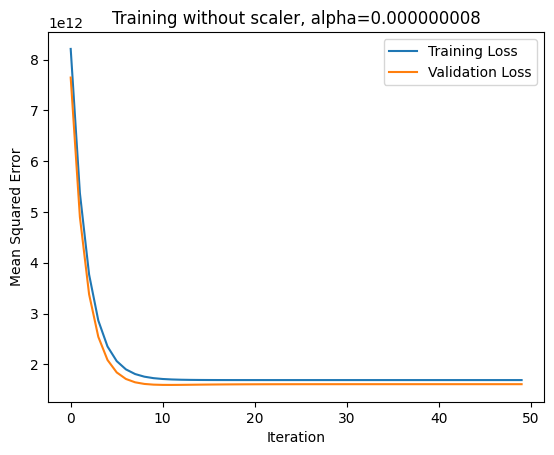

In [37]:
# Plot the training and validation loss after each iteration
plt.plot(training_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training without scaler, alpha=0.000000008")
plt.show()